In [19]:
# Set up matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
# Set up dependencies
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta    

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

# Get the list of class names (table names)
table_names = Base.classes.keys()

In [24]:
# View all of the classes that automap found
print(table_names)

['measurement', 'station']


In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [56]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: ('2017-08-23',)


In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()  

    
# Save the query results as a Pandas DataFrame. Explicitly set the column names  
last_yr_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
last_yr_df = last_yr_df.sort_values('date')

# Check the dataframe for the oldest date
last_yr_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [39]:
# Double check the dataframe for the most recent date
last_yr_df.tail()

,date,precipitation
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2229,2017-08-23,0.45


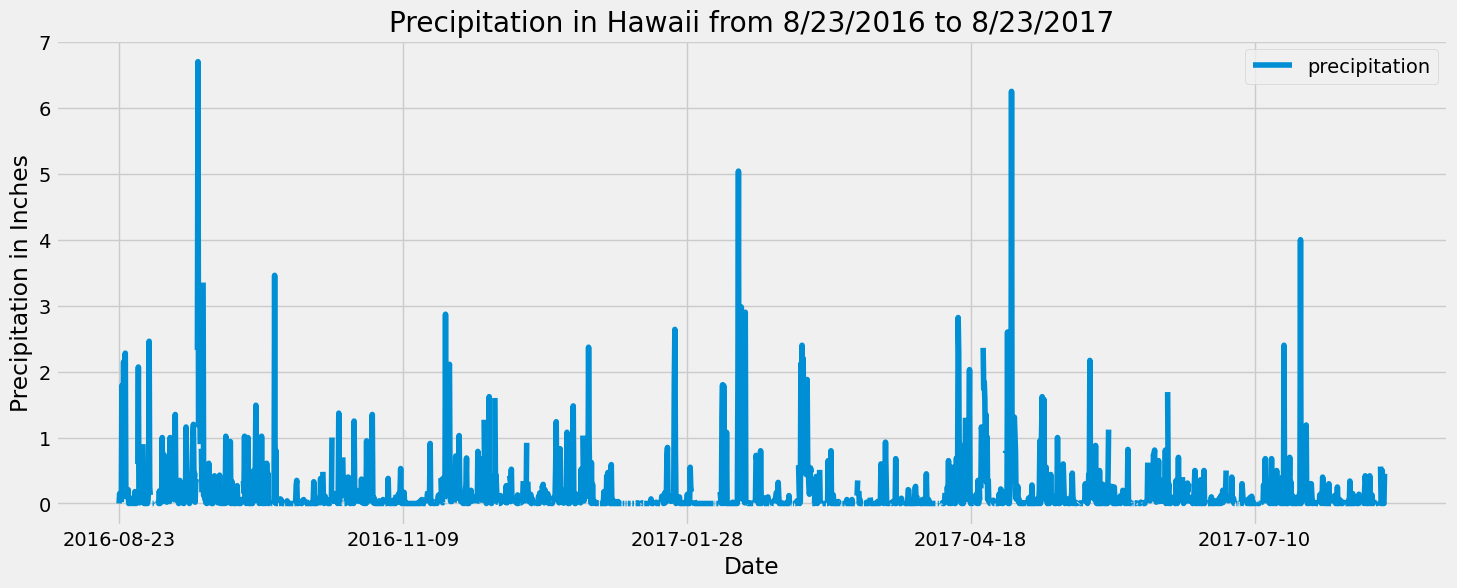

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
last_yr_df.plot(x='date', y='precipitation', figsize=(16,6))   
plt.title("Precipitation in Hawaii from 8/23/2016 to 8/23/2017")
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
# Set the x-axis limits (adjust these values as needed)
plt.show()

In [30]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_yr_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_actvity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
    
station_actvity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Answer the question of which station has the highest number of observations?

most_active_station = {station_actvity[0][0]: station_actvity[0][1]}    

print(f"The station with the greatest number of observations is {most_active_station})")

The station with the greatest number of observations is {'USC00519281': 2772})


In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()    

[(54.0, 85.0, 71.66378066378067)]

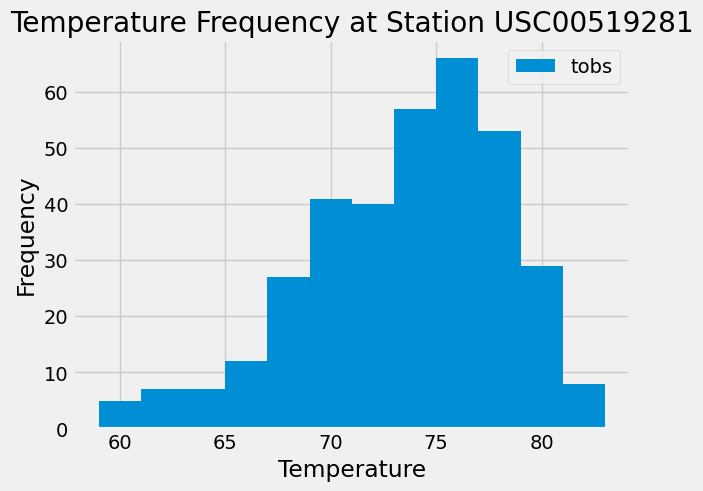

In [35]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.tobs).filter((Measurement.station == 'USC00519281')&(Measurement.date>='2016-08-23')).all()
pd.DataFrame(results).plot.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency at Station USC00519281");

# Close Session

In [36]:
# Close Session
session.close()